In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install jovian opendatasets --upgrade --quiet
import opendatasets as od

     |████████████████████████████████| 68 kB 2.8 MB/s 


In [2]:
# dataset_url = 'https://www.kaggle.com/omeret/not-safe-for-work'
# dataset_url = 'https://www.kaggle.com/bingazuran/nsfwsfwdataset2'
dataset_url = 'https://www.kaggle.com/bingazuran/nsfwsfwecd'

In [3]:
!pip install jovian opendatasets --upgrade --quiet
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bingazuran
Your Kaggle Key: ··········


100%|██████████| 2.80G/2.80G [00:52<00:00, 56.8MB/s]


In [4]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import torchvision.transforms as transforms
import torch.nn.functional as F
from torchsummary import summary
from torchvision import models

In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [9]:
data_dir = './nsfwsfwecd/DataSet'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'test']
['nsfw', 'sfw']


In [7]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [33]:
# transform = transforms.Compose([

#     transforms.Resize(256),
#     transforms.CenterCrop(256),

#     transforms.ToTensor(),
# ])

transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [34]:
trainset = ImageFolder(data_dir+'/train', transform=transform_train)
# valset = ImageFolder(data_dir+'/train', transform=transform)
testset = ImageFolder(data_dir+'/test', transform=transform_test)

In [12]:
print(len(trainset))
print(len(testset))

2004
1000


In [ ]:
train_indexes = np.loadtxt('/content/sample_data/train_index.txt')
test_indexes = np.loadtxt('/content/sample_data/test_index.txt')

In [ ]:
train_indexes = train_indexes.astype(int)
test_indexes = test_indexes.astype(int)

In [ ]:
# trainset_subset = torch.utils.data.Subset(trainset, np.random.choice(len(trainset), 5000, replace=False))
# val_subset = torch.utils.data.Subset(valset, np.random.choice(len(valset), 300, replace=False))
# testset_subset = torch.utils.data.Subset(testset, np.random.choice(len(testset), 100, replace=False))
trainset_subset = torch.utils.data.Subset(trainset, train_indexes)
testset_subset = torch.utils.data.Subset(testset, test_indexes)

In [ ]:
img, label = trainset_subset[0]
print(img.shape, label)
print(len(trainset_subset))
print(len(testset_subset))

In [13]:
# input_size = 65536*3
hidden_size = 500 
num_classes = 2
num_epochs = 15
batch_size = 16
learning_rate = 0.001 

In [35]:
train_loader = torch.utils.data.DataLoader(
    dataset=trainset,
    batch_size=batch_size,
    shuffle=False  
)

In [36]:
test_loader = torch.utils.data.DataLoader(
    dataset=testset,
    batch_size=batch_size,
    shuffle=False
)

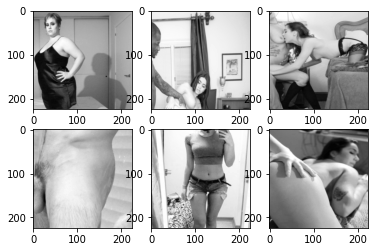

In [37]:
 examples = iter(test_loader)
 example_data, example_targets = examples.next()
 for i in range(6):
     plt.subplot(2,3,i+1)
     plt.imshow(example_data[i][0], cmap='gray')
 plt.show() 

# Nueral Net


In [ ]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.LeakyReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)

## 10 epochs

In [ ]:
# Train the model
n_total_steps = len(train_loader)
loss_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 256*256*3).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_list.append(loss.item())
        if (i+1) % 10 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
    print()

Epoch [1/10], Step [10/50], Loss: 25.9096
Epoch [1/10], Step [20/50], Loss: 1.8519
Epoch [1/10], Step [30/50], Loss: 1.9161
Epoch [1/10], Step [40/50], Loss: 4.1366
Epoch [1/10], Step [50/50], Loss: 2.1273

Epoch [2/10], Step [10/50], Loss: 8.3146
Epoch [2/10], Step [20/50], Loss: 1.4379
Epoch [2/10], Step [30/50], Loss: 13.0775
Epoch [2/10], Step [40/50], Loss: 2.3738
Epoch [2/10], Step [50/50], Loss: 6.0402

Epoch [3/10], Step [10/50], Loss: 2.8274
Epoch [3/10], Step [20/50], Loss: 13.5796
Epoch [3/10], Step [30/50], Loss: 3.6296
Epoch [3/10], Step [40/50], Loss: 2.1968
Epoch [3/10], Step [50/50], Loss: 2.1744

Epoch [4/10], Step [10/50], Loss: 2.4998
Epoch [4/10], Step [20/50], Loss: 8.5062
Epoch [4/10], Step [30/50], Loss: 1.4848
Epoch [4/10], Step [40/50], Loss: 2.1500
Epoch [4/10], Step [50/50], Loss: 3.3211

Epoch [5/10], Step [10/50], Loss: 5.2145
Epoch [5/10], Step [20/50], Loss: 8.2313
Epoch [5/10], Step [30/50], Loss: 1.7927
Epoch [5/10], Step [40/50], Loss: 2.1523
Epoch [5/

tensor([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 1])
NSFW


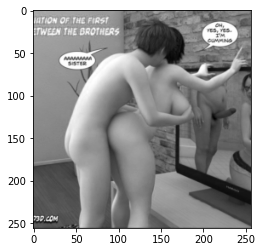

NSFW


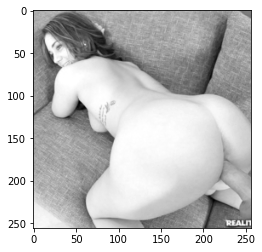

NSFW


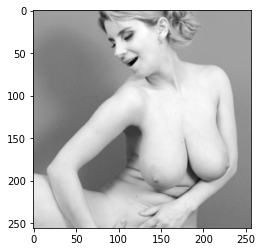

SFW


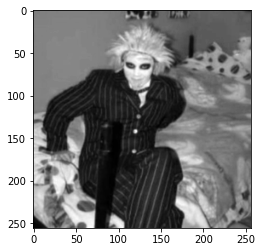

SFW


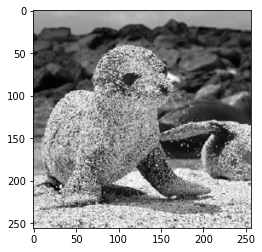

SFW


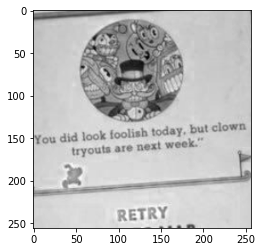

Accuracy of the network on the 100 test images: 62.0 %


In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
examples = iter(test_loader)
j = 0
example_data, example_targets = examples.next()
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images1 = images.reshape(-1, 256*256*3).to(device)
        labels = labels.to(device)
        outputs = model(images1)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        print(predicted)
        # if predicted == label:
        #   plt.imshow(, cmap='gray')

        for i in range(len(predicted)):
          if predicted[i] == labels[i]:
            # plt.subplot(2,30,i+1)
            j += 1
            if j == 7:
              break
            
            plt.imshow(example_data[i][0], cmap='gray')
            if predicted[i] == 0:
              print("NSFW")
            else:
              print("SFW")
            
            plt.show() 
            
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 100 test images: {acc} %')

[]

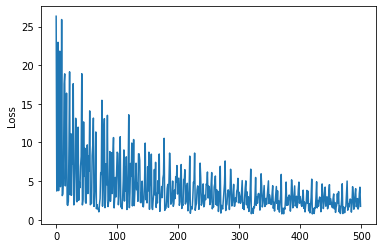

In [ ]:
plt.plot(loss_list)
plt.ylabel("Loss")
plt.plot()

##  12 epochs

In [ ]:
# Train the model
n_total_steps = len(train_loader)
loss_list = []
for epoch in range(num_epochs + 2):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 256*256*3).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_list.append(loss.item())
        if (i+1) % 10 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
    print()

Epoch [1/10], Step [10/100], Loss: 0.6428
Epoch [1/10], Step [20/100], Loss: 0.6154
Epoch [1/10], Step [30/100], Loss: 0.5918
Epoch [1/10], Step [40/100], Loss: 0.5985
Epoch [1/10], Step [50/100], Loss: 0.6619
Epoch [1/10], Step [60/100], Loss: 0.5776
Epoch [1/10], Step [70/100], Loss: 0.5816
Epoch [1/10], Step [80/100], Loss: 0.6006
Epoch [1/10], Step [90/100], Loss: 0.5645
Epoch [1/10], Step [100/100], Loss: 0.5930

Epoch [2/10], Step [10/100], Loss: 0.5449
Epoch [2/10], Step [20/100], Loss: 0.5819
Epoch [2/10], Step [30/100], Loss: 0.5611
Epoch [2/10], Step [40/100], Loss: 0.5549
Epoch [2/10], Step [50/100], Loss: 0.5814
Epoch [2/10], Step [60/100], Loss: 0.5604
Epoch [2/10], Step [70/100], Loss: 0.5774
Epoch [2/10], Step [80/100], Loss: 0.5593
Epoch [2/10], Step [90/100], Loss: 0.5206
Epoch [2/10], Step [100/100], Loss: 0.5891

Epoch [3/10], Step [10/100], Loss: 0.5246
Epoch [3/10], Step [20/100], Loss: 0.5521
Epoch [3/10], Step [30/100], Loss: 0.5296
Epoch [3/10], Step [40/100], L

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 256*256*3).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 1000 test images: {acc} %')

Accuracy of the network on the 1000 test images: 75.0 %


# VGG

In [ ]:
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)

        self.conv2_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)

        self.conv3_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)

        self.conv4_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

        self.conv5_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(25088, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 10)

    def forward(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        x = self.maxpool(x)
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = self.maxpool(x)
        x = F.relu(self.conv5_1(x))
        x = F.relu(self.conv5_2(x))
        x = F.relu(self.conv5_3(x))
        x = self.maxpool(x)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, 0.5) #dropout was included to combat overfitting
        x = F.relu(self.fc2(x))
        x = F.dropout(x, 0.5)
        x = self.fc3(x)
        return x

In [ ]:
model = VGG16() #to compile the model
model = model.to(device=device) #to send the model for training on either cuda or cpu

## Loss and optimizer
# learning_rate = 1e-4 #I picked this because it seems to be the most used by experts
load_model = True
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= learning_rate) #Adam seems to be the most popular for deep learning

## Training

In [ ]:
for epoch in range(10): #I decided to train the model for 50 epochs
    loss_ep = 0
    
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device=device)
        targets = targets.to(device=device)
        ## Forward Pass
        optimizer.zero_grad()
        scores = model(data)
        loss = criterion(scores,targets)
        loss.backward()
        optimizer.step()
        loss_ep += loss.item()
    print(f"Loss in epoch {epoch} :::: {loss_ep/len(train_loader)}")

    with torch.no_grad():
        num_correct = 0
        num_samples = 0
        for batch_idx, (data,targets) in enumerate(val_loader):
            data = data.to(device=device)
            targets = targets.to(device=device)
            ## Forward Pass
            scores = model(data)
            _, predictions = scores.max(1)
            num_correct += (predictions == targets).sum()
            num_samples += predictions.size(0)
        print(
            f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}"
        )

NameError: ignored

# VGG -inbuilt

## VGG13

In [ ]:
vgg = models.vgg13_bn(pretrained=True)

In [18]:
vgg = models.vgg13(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg13-19584684.pth" to /root/.cache/torch/hub/checkpoints/vgg13-19584684.pth


  0%|          | 0.00/508M [00:00<?, ?B/s]

In [ ]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

### VGG1

In [19]:
for param in vgg.parameters():
    param.requires_grad = False

In [20]:
num_classes = 2
final_in_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(final_in_features, num_classes)

In [21]:
for param in vgg.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([2, 4096])
torch.Size([2])


In [22]:
vgg1 = vgg.to(device)
loss_fn = nn.NLLLoss()
#loss_fn2 = nn.CrossEntropyLoss()
opt = optim.Adadelta(vgg.parameters(), lr=0.05)

In [23]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [26]:
loss_epoch_arr = []
max_epochs = 15
train_accuracy = []
test_accuracy = []

n_iters = np.ceil(2004/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(train_loader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)

        loss.backward()
        opt.step()
        
        if i % 100 == 0:
            print('Iteration: %d/%d, NLLLoss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
    
    train_A = evaluation(train_loader, vgg)
    test_A = evaluation(test_loader, vgg)

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % ( epoch, max_epochs, test_A, train_A))
    train_accuracy.append(train_A)
    test_accuracy.append(test_A)

Iteration: 0/126, NLLLoss: -0.04
Iteration: 100/126, NLLLoss: -3.97
Epoch: 0/15, Test acc: 61.20, Train acc: 63.82
Iteration: 0/126, NLLLoss: -7.76
Iteration: 100/126, NLLLoss: -10.48
Epoch: 1/15, Test acc: 62.10, Train acc: 68.51
Iteration: 0/126, NLLLoss: -15.55
Iteration: 100/126, NLLLoss: -17.08
Epoch: 2/15, Test acc: 62.70, Train acc: 70.31
Iteration: 0/126, NLLLoss: -22.62
Iteration: 100/126, NLLLoss: -23.56
Epoch: 3/15, Test acc: 63.40, Train acc: 72.26
Iteration: 0/126, NLLLoss: -31.00
Iteration: 100/126, NLLLoss: -31.26
Epoch: 4/15, Test acc: 64.50, Train acc: 74.50
Iteration: 0/126, NLLLoss: -38.66
Iteration: 100/126, NLLLoss: -36.59
Epoch: 5/15, Test acc: 64.20, Train acc: 74.50
Iteration: 0/126, NLLLoss: -46.62
Iteration: 100/126, NLLLoss: -41.24
Epoch: 6/15, Test acc: 64.90, Train acc: 74.10
Iteration: 0/126, NLLLoss: -54.28
Iteration: 100/126, NLLLoss: -50.28
Epoch: 7/15, Test acc: 64.70, Train acc: 73.95
Iteration: 0/126, NLLLoss: -62.44
Iteration: 100/126, NLLLoss: -57.

In [ ]:
test_accuracy = []

[50.0, 50.0, 50.0, 50.0, 50.0]

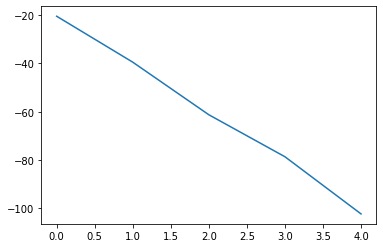

In [ ]:
plt.plot(loss_epoch_arr)
plt.show()

### VGG2

In [38]:
for param in vgg.parameters():
    param.requires_grad = False

In [41]:
num_classes = 2
final_in_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(final_in_features, num_classes)

In [40]:
for param in vgg1.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([2, 4096])
torch.Size([2])


In [46]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.05)

In [47]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [48]:
loss_epoch_arr1 = []
max_epochs = 5
train_accuracy = []
test_accuracy = []

n_iters = np.ceil(5000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(train_loader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)

        loss.backward()
        opt.step()
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Cross Entropy Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
        loss_epoch_arr1.append(loss.item())
    
    train_A = evaluation(train_loader, vgg)
    test_A = evaluation(test_loader, vgg)

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % ( epoch, max_epochs, test_A, train_A))
    train_accuracy.append(train_A)
    test_accuracy.append(test_A)

Iteration: 0/313, Cross Entropy Loss: 4.44
Iteration: 100/313, Cross Entropy Loss: 0.00
Epoch: 0/5, Test acc: 59.30, Train acc: 67.56
Iteration: 0/313, Cross Entropy Loss: 5.80
Iteration: 100/313, Cross Entropy Loss: 0.00
Epoch: 1/5, Test acc: 61.20, Train acc: 76.15
Iteration: 0/313, Cross Entropy Loss: 2.41
Iteration: 100/313, Cross Entropy Loss: 0.00
Epoch: 2/5, Test acc: 61.70, Train acc: 76.35
Iteration: 0/313, Cross Entropy Loss: 3.81
Iteration: 100/313, Cross Entropy Loss: 0.00
Epoch: 3/5, Test acc: 58.30, Train acc: 69.71
Iteration: 0/313, Cross Entropy Loss: 2.75
Iteration: 100/313, Cross Entropy Loss: 0.00
Epoch: 4/5, Test acc: 59.00, Train acc: 72.41


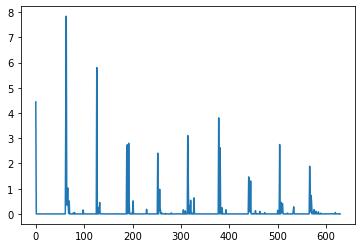

In [49]:
plt.plot(loss_epoch_arr1)
plt.show()

## VGG19

### VGG16

In [ ]:
vgg19 = models.vgg19(pretrained=True)

In [ ]:
print(vgg19)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
for param in vgg19.parameters():
    param.requires_grad = False

In [ ]:
num_classes = 2
final_in_features = vgg19.classifier[6].in_features
vgg19.classifier[6] = nn.Linear(final_in_features, num_classes)

In [ ]:
for param in vgg19.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([2, 4096])
torch.Size([2])


In [ ]:
vgg19 = vgg19.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg19.parameters(), lr=0.05)

In [ ]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
loss_epoch_arr = []
max_epochs = 5
train_accuracy = []
test_accuracy = []

n_iters = np.ceil(5000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(train_loader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg19(inputs)
        loss = loss_fn(outputs, labels)

        loss.backward()
        opt.step()
        
        if i % 100 == 0:
            print('Iteration: %d/%d, NLLLoss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
    
    train_A = evaluation(train_loader, vgg19)
    test_A = evaluation(test_loader, vgg19)

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % ( epoch, max_epochs, test_A, train_A))
    train_accuracy.append(train_A)
    test_accuracy.append(test_A)

Iteration: 0/313, NLLLoss: 0.00
Iteration: 100/313, NLLLoss: 0.00
Iteration: 200/313, NLLLoss: 0.00
Iteration: 300/313, NLLLoss: 0.00
Epoch: 0/5, Test acc: 50.50, Train acc: 50.68
Iteration: 0/313, NLLLoss: 8.48
Iteration: 100/313, NLLLoss: 0.00
Iteration: 200/313, NLLLoss: 0.00
Iteration: 300/313, NLLLoss: 0.00
Epoch: 1/5, Test acc: 51.30, Train acc: 50.74
Iteration: 0/313, NLLLoss: 9.47
Iteration: 100/313, NLLLoss: 0.00
Iteration: 200/313, NLLLoss: 0.00
Iteration: 300/313, NLLLoss: 0.00
Epoch: 2/5, Test acc: 51.20, Train acc: 51.18
Iteration: 0/313, NLLLoss: 12.15
Iteration: 100/313, NLLLoss: 0.00
Iteration: 200/313, NLLLoss: 0.00
Iteration: 300/313, NLLLoss: 0.00
Epoch: 3/5, Test acc: 56.40, Train acc: 54.54
Iteration: 0/313, NLLLoss: 7.61
Iteration: 100/313, NLLLoss: 0.00
Iteration: 200/313, NLLLoss: 0.00
Iteration: 300/313, NLLLoss: 0.00
Epoch: 4/5, Test acc: 54.80, Train acc: 53.96


In [ ]:
acc = 0

for i in test_accuracy:
  acc += i
acc /= len(test_accuracy)
acc

52.839999999999996

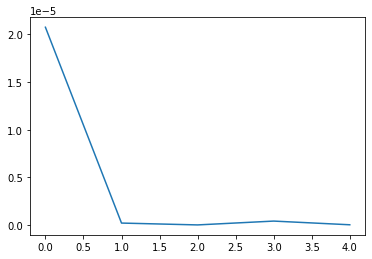

In [ ]:
plt.plot(loss_epoch_arr)
plt.show()

### VGG19-BN


In [ ]:
vgg = models.vgg16_bn(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
print(vgg)

In [ ]:
for param in vgg.parameters():
    param.requires_grad = True

In [ ]:
num_classes = 2
final_in_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(final_in_features, num_classes)

In [ ]:
for param in vgg.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([64, 3, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512,

In [ ]:
vgg = vgg.to(device)
# loss_fn = nn.NLLLoss()
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adadelta(vgg.parameters(), lr=0.05)

In [ ]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
loss_epoch_arr = []
max_epochs = 5
train_accuracy = []
test_accuracy = []

n_iters = np.ceil(5000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(train_loader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)

        loss.backward()
        opt.step()
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
    
    train_A = evaluation(train_loader, vgg)
    test_A = evaluation(test_loader, vgg)

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % ( epoch, max_epochs, test_A, train_A))
    train_accuracy.append(train_A)
    test_accuracy.append(test_A)

Iteration: 0/313, Loss: 0.04
Iteration: 100/313, Loss: 0.00
Iteration: 200/313, Loss: 0.02
Iteration: 300/313, Loss: 0.00
Epoch: 0/5, Test acc: 50.00, Train acc: 50.00
Iteration: 0/313, Loss: 7.44
Iteration: 100/313, Loss: 0.00
Iteration: 200/313, Loss: 0.00
Iteration: 300/313, Loss: 0.00
Epoch: 1/5, Test acc: 50.00, Train acc: 50.00
Iteration: 0/313, Loss: 5.18
Iteration: 100/313, Loss: 0.00
Iteration: 200/313, Loss: 0.00
Iteration: 300/313, Loss: 0.00
Epoch: 2/5, Test acc: 53.80, Train acc: 52.98
Iteration: 0/313, Loss: 0.66
Iteration: 100/313, Loss: 0.00
Iteration: 200/313, Loss: 0.00
Iteration: 300/313, Loss: 0.00
Epoch: 3/5, Test acc: 73.20, Train acc: 71.26
Iteration: 0/313, Loss: 0.00
Iteration: 100/313, Loss: 0.00
Iteration: 200/313, Loss: 0.00
Iteration: 300/313, Loss: 0.00
Epoch: 4/5, Test acc: 87.00, Train acc: 90.48


In [ ]:
acc = 0

for i in test_accuracy:
  acc += i
acc /= len(test_accuracy)
acc

62.8

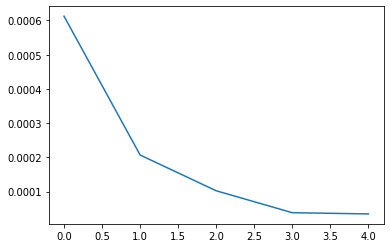

In [ ]:
plt.plot(loss_epoch_arr)
plt.show()